Let's start with importing libraries, reading a file with data to a Pandas Dataframe and cheking basic information about data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('beer_reviews.csv')

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


The dataset consists of 1586614 entries, each entry is one review and shows what users think about such beer features as taste, appearance, aroma, palate, and overall impression. 
The dataset looks pretty good, but there are missing values in Brewery_name, Review_profilename, and Beer_abv columns.

In [5]:
# let's look at missing values in Brewery_name column: there are 15 entries about 2 breweries
df[pd.isna(df['brewery_name'])]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [9]:
# Missing values in Review_profilename: 348 entries
df[pd.isna(df['review_profilename'])].head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
8869,395,Bluegrass Brewing Co. - East St. Matthew's,1205005717,4.0,4.0,3.5,NaN,American Double / Imperial Stout,3.0,3.5,Jefferson's Reserve Bourbon Barrel Stout,8.5,29687
22125,1199,Founders Brewing Company,1231726538,4.0,4.5,4.5,NaN,American Double / Imperial Stout,4.0,4.5,Founders Breakfast Stout,8.3,11757
31822,1199,Founders Brewing Company,1246501387,4.0,4.0,4.0,NaN,American IPA,4.0,4.5,Founders Centennial IPA,7.2,5441
33500,1199,Founders Brewing Company,1238871081,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
33678,1199,Founders Brewing Company,1227224257,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960


In [14]:
#Missing values in Beer_abv: 67785 entries
#I assume that beer_abv is more important for analysis that profilename, so let's try to do smth with it
miss = df[pd.isna(df['beer_abv'])]
miss['beer_beerid'].nunique()

17043

In [31]:
#Good news! The number of unique reviews beers is less than number of reviews, we could try and find abv for them in
#other reviews
miss_beerid = miss['beer_beerid'].unique().tolist()

In [30]:
#Let's look through all dataset and try to find reviews for this beers with not missing abv
xx = df[(df['beer_beerid'].isin(miss_beerid)) & (~df['beer_abv'].isnull())]
xx.size

0

In [ ]:
#Ok, there is not any other review for any of this beers with nonmissing abv
#Let's try another thing: calculate median abv for beerstyle and fill missing values
# !!! Insert here analysis of this variable (distribution, outliers) to justify the decision to use a median

In [56]:
# 1. Calculate median abv for each style
median_abv = df[['beer_style','beer_abv']][~df['beer_abv'].isnull()].groupby(['beer_style']).median().reset_index()
median_abv.head()

,beer_style,beer_abv
0,Altbier,5.3
1,American Adjunct Lager,4.8
2,American Amber / Red Ale,5.6
3,American Amber / Red Lager,4.9
4,American Barleywine,10.2


In [33]:
# 2. Fill the missing values with median
styles = miss['beer_style'].unique().tolist()
for style in styles:
    

['American Stout',
 'Scotch Ale / Wee Heavy',
 'American IPA',
 'American Double / Imperial Stout',
 'American Strong Ale',
 'Belgian Strong Pale Ale',
 'American Amber / Red Ale',
 'Fruit / Vegetable Beer',
 'Light Lager',
 'American Pale Ale (APA)']

In [55]:
df[['beer_style','beer_abv']][~df['beer_abv'].isnull()].groupby(['beer_style']).median().reset_index()

,beer_style,beer_abv
0,Altbier,5.30
1,American Adjunct Lager,4.80
2,American Amber / Red Ale,5.60
3,American Amber / Red Lager,4.90
4,American Barleywine,10.20
5,American Black Ale,8.00
6,American Blonde Ale,5.00
7,American Brown Ale,6.00
8,American Dark Wheat Ale,5.40
9,American Double / Imperial IPA,9.00


In [5]:
print('Number of breweries: ',df['brewery_id'].nunique())

Number of breweries:  5840


In [6]:
print('Number of beers: ', df['beer_beerid'].nunique())

Number of beers:  66055


In [18]:
print('Number of beer styles: ', df['beer_style'].nunique())

Number of beer styles:  104


In [7]:
print('Average overall impression: ', df['review_overall'].mean())

Average overall impression:  3.8155808533140387


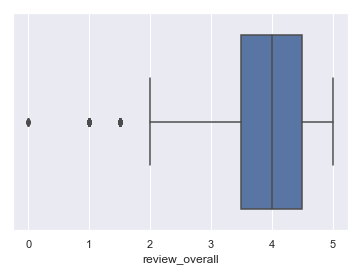

In [8]:
sns.boxplot(x=df['review_overall'])

In [17]:
#The most/least liked beers (by review_overall)

In [57]:
scores = df[['brewery_name', 'beer_style', 'beer_name','review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste'
             ]]
scores = scores.groupby(['beer_style']).mean().reset_index()
scores.head()

,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,Altbier,3.824054,3.624015,3.809327,3.713086,3.744865
1,American Adjunct Lager,3.001659,2.480211,2.788546,2.735471,2.683112
2,American Amber / Red Ale,3.781010,3.627254,3.810190,3.656696,3.696127
3,American Amber / Red Lager,3.564601,3.213296,3.527494,3.354795,3.373590
4,American Barleywine,3.896756,4.019343,4.036535,3.996521,4.042633


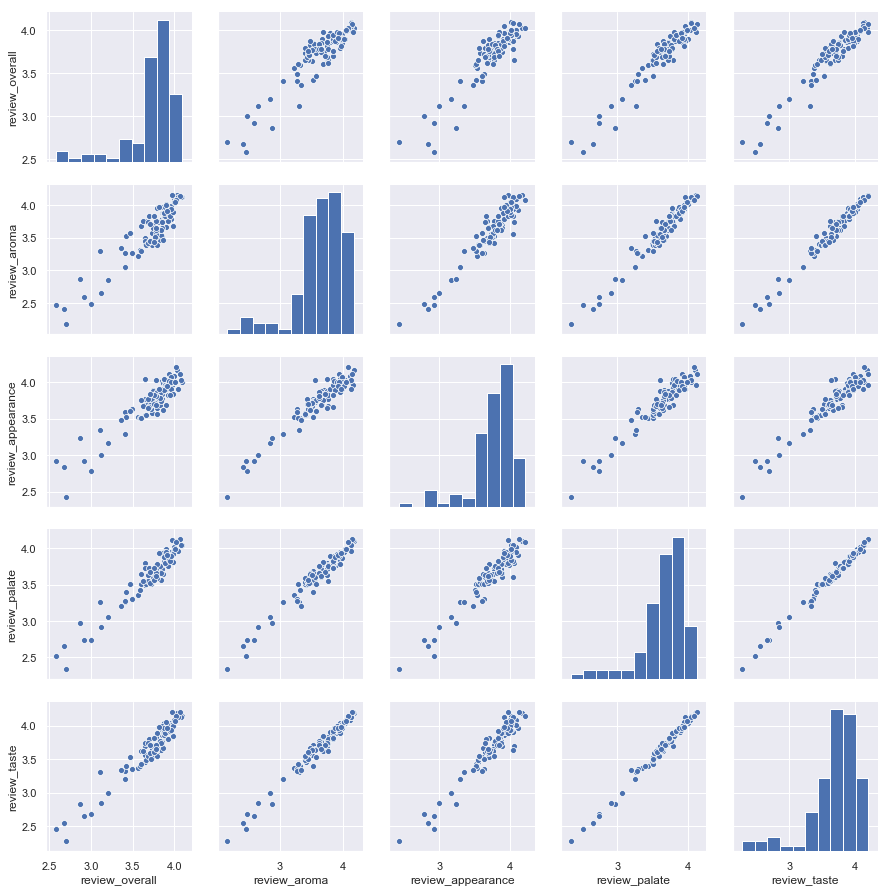

In [64]:
sns.pairplot(scores)

In [42]:
#10 least liked beer styles
overall = df[['brewery_name', 'beer_style', 'beer_name','review_overall']]
ov_style = overall.groupby(['beer_style']).mean().reset_index()
ov_style.sort_values('review_overall').head(10)

,beer_style,review_overall
77,Low Alcohol Beer,2.578268
13,American Malt Liquor,2.678854
76,Light Lager,2.698833
54,Euro Strong Lager,2.862518
64,Happoshu,2.914938
1,American Adjunct Lager,3.001659
34,Chile Beer,3.113298
69,Japanese Rice Lager,3.119987
53,Euro Pale Lager,3.202775
72,Kvass,3.355219


In [43]:
#10 most liked beer styles
ov_style.sort_values('review_overall', ascending=False).head(10)

,beer_style,review_overall
20,American Wild Ale,4.093262
63,Gueuze,4.086287
86,Quadrupel (Quad),4.071630
75,Lambic - Unblended,4.048923
11,American Double / Imperial Stout,4.029820
89,Russian Imperial Stout,4.023084
100,Weizenbock,4.007969
9,American Double / Imperial IPA,3.998017
58,Flanders Red Ale,3.992722
90,Rye Beer,3.981737


In [62]:
#Let's explore 5 the most rated beer styles
styles = ['American Wild Ale', 'Gueuze', 'Quadrupel (Quad)', 'Lambic - Unblended', 'American Double / Imperial Stout']
beers = df[df['beer_style'].isin(styles)]
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
935,2724,Pacific Coast Brewing Company,1293611047,3.0,4.0,4.0,womencantsail,American Double / Imperial Stout,3.5,3.0,Leviathan Imperial Stout,10.0,39606
936,2724,Pacific Coast Brewing Company,1291596349,4.5,3.5,4.0,isualum12,American Double / Imperial Stout,4.0,3.5,Leviathan Imperial Stout,10.0,39606
938,2724,Pacific Coast Brewing Company,1278811077,4.5,3.5,3.5,4000qtrap,American Double / Imperial Stout,3.0,2.5,Leviathan Imperial Stout,10.0,39606
939,2724,Pacific Coast Brewing Company,1249951968,4.0,4.0,4.5,Georgiabeer,American Double / Imperial Stout,4.0,4.0,Leviathan Imperial Stout,10.0,39606


In [ ]:
#Review_aroma: distribution, beers with the highest/smallest scores, average score for different styles, correlation with review_overall

In [ ]:
#Review_appearance: distribution, beers with highest/smallest scores, average score for different styles, correlation with review_overall

In [ ]:
#Review_palate: distribution, beers with highest/smallest scores, average score for different styles, correlation with review_overall

In [ ]:
#Review_taste: distribution, beers with highest/smallest scores, average score for different styles, correlation with review_overall

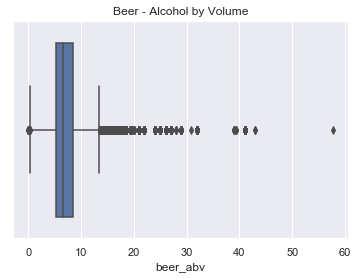

In [12]:
sns.boxplot(x=df['beer_abv'])
plt.title('Beer - Alcohol by Volume')
plt.show()

In [16]:
#Top10 the most strongest beers
strong_beers = df.sort_values(by=['beer_abv'], ascending=False)[['brewery_name', 'beer_style', 'beer_name', 'beer_abv']]
strong_beers.drop_duplicates().head(10)

,brewery_name,beer_style,beer_name,beer_abv
12919,Schorschbräu,Eisbock,Schorschbräu Schorschbock 57%,57.70
12939,Schorschbräu,Eisbock,Schorschbräu Schorschbock 43%,43.00
746385,BrewDog,American Double / Imperial IPA,Sink The Bismarck!,41.00
12941,Schorschbräu,Eisbock,Schorschbräu Schorschbock 40%,39.44
996153,De Struise Brouwers,American Double / Imperial Stout,Black Damnation VI - Messy,39.00
748356,BrewDog,American Double / Imperial Stout,Tactical Nuclear Penguin,32.00
12918,Schorschbräu,Eisbock,Schorschbräu Schorschbock 31%,30.86
1042328,Hair of the Dog Brewing Company / Brewery and ...,English Barleywine,Dave,29.00
746421,BrewDog,Belgian Strong Pale Ale,Ghost Deer,28.00
293821,Boston Beer Company (Samuel Adams),American Strong Ale,Samuel Adams Utopias,27.00


In [63]:
#Which brewery has the biggest number of beers, which smallest

In [ ]:
#Which brewery has the best/worse score

In [ ]:
#What beer/brewery/beerstyle has the most/least reviews

In [ ]:
#What users wrote the most reviews and what beerstyle was popular amongst them